<a href="https://colab.research.google.com/github/SuhelAnsari9272/Airbnb-booking-analysis/blob/main/Airbnb_capstone_ABADS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

In [3]:
# reading the files
calender_data = pd.read_csv('/content/drive/MyDrive/AirBnb_ABADS/calendar.csv')
host_data = pd.read_csv('/content/drive/MyDrive/AirBnb_ABADS/hosts.csv')
listing_data = pd.read_csv('/content/drive/MyDrive/AirBnb_ABADS/listings.csv')
reviews_data = pd.read_csv('/content/drive/MyDrive/AirBnb_ABADS/reviews.csv')

In [4]:
# Copying the data
cal_df = calender_data.copy()
host_df = host_data.copy()
list_df = listing_data.copy()
reviews_df = reviews_data.copy()

#### Calender data

In [5]:
#data overview
cal_df.head()

,calender_id,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,1,40334325,2022-08-03 00:00:00.000000,0,56.0,56.0,3,5
1,2,22742449,2022-11-13 00:00:00.000000,1,95.0,95.0,2,99
2,3,34621717,2022-04-17 00:00:00.000000,0,75.0,75.0,2,1125
3,4,38281744,2022-01-31 00:00:00.000000,1,150.0,150.0,1,1000
4,5,18835003,2022-05-21 00:00:00.000000,0,100.0,100.0,2,1125


In [6]:
cal_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319192 entries, 0 to 319191
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   calender_id     319192 non-null  int64  
 1   listing_id      319192 non-null  int64  
 2   date            319192 non-null  object 
 3   available       319192 non-null  int64  
 4   price           319117 non-null  float64
 5   adjusted_price  319117 non-null  float64
 6   minimum_nights  319192 non-null  int64  
 7   maximum_nights  319192 non-null  int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 19.5+ MB


In [7]:
missing_values =  np.round(cal_df.isnull().sum() / (cal_df.shape[0]) * 100, 2)
print(missing_values)

calender_id       0.00
listing_id        0.00
date              0.00
available         0.00
price             0.02
adjusted_price    0.02
minimum_nights    0.00
maximum_nights    0.00
dtype: float64


In [8]:
#removing null values from the dataframe
cal_df.dropna(inplace = True)

In [9]:
cal_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 319117 entries, 0 to 319191
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   calender_id     319117 non-null  int64  
 1   listing_id      319117 non-null  int64  
 2   date            319117 non-null  object 
 3   available       319117 non-null  int64  
 4   price           319117 non-null  float64
 5   adjusted_price  319117 non-null  float64
 6   minimum_nights  319117 non-null  int64  
 7   maximum_nights  319117 non-null  int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 21.9+ MB


In [10]:

cal_df.describe()

,calender_id,listing_id,available,price,adjusted_price,minimum_nights,maximum_nights
count,319117.000000,3.191170e+05,319117.000000,319117.000000,319117.000000,319117.000000,319117.000000
mean,159595.247633,3.488444e+07,0.535318,109.917779,109.712131,5.378855,812.348245
std,92142.796298,1.523418e+07,0.498752,185.791168,185.551851,21.458047,511.557606
min,1.000000,5.090400e+04,0.000000,13.000000,13.000000,1.000000,1.000000
25%,79798.000000,2.338661e+07,0.000000,59.000000,58.000000,1.000000,365.000000
50%,159595.000000,3.891969e+07,1.000000,79.000000,79.000000,2.000000,1125.000000
75%,239390.000000,4.839174e+07,1.000000,115.000000,115.000000,3.000000,1125.000000
max,319192.000000,5.398332e+07,1.000000,5800.000000,5800.000000,500.000000,9999.000000


* Most of the listings are available to be booked.
* There is presence of outliers in the price column. The distribution of price is right skewed.
* The values of minimum nights and maximum nights have very large numbers which need to be verified.

<Axes: xlabel='price', ylabel='Density'>

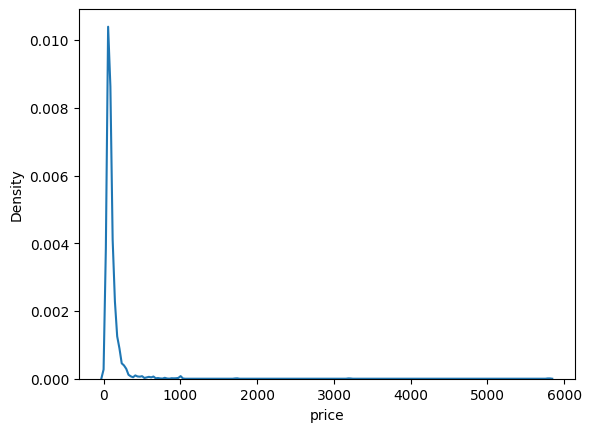

In [11]:
from matplotlib import pyplot as plt
sns.kdeplot(cal_df['price'])

<Axes: ylabel='price'>

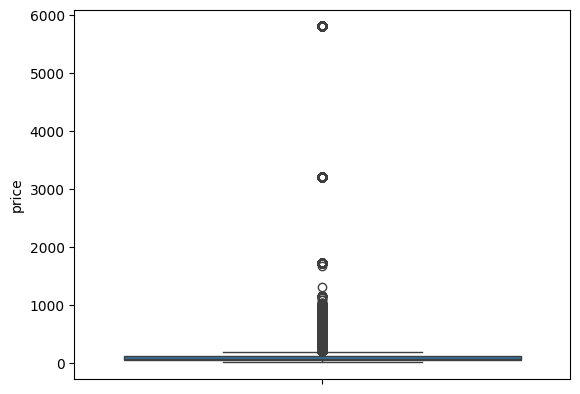

In [12]:
#Boxplot of price columns
sns.boxplot(cal_df['price'])

In [13]:
#Frequency distribution of availablity
cal_df['available'].value_counts()

1    170829
0    148288
Name: available, dtype: int64

In [14]:
cal_df['available'].value_counts() / cal_df.shape[0] *100

1    53.531777
0    46.468223
Name: available, dtype: float64

<Axes: xlabel='available', ylabel='count'>

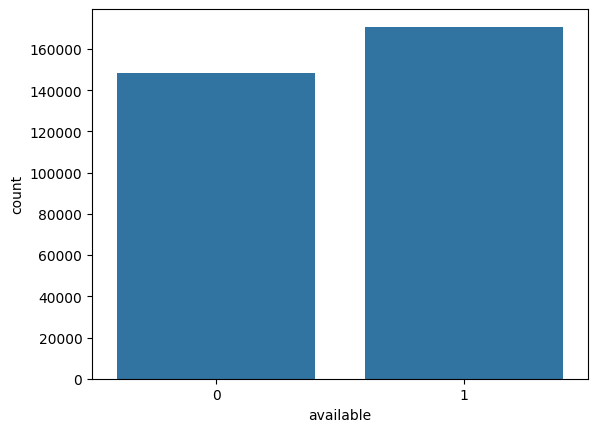

In [15]:
#Countplot for availablity
sns.countplot(x = 'available', data = cal_df)

<Axes: xlabel='price', ylabel='minimum_nights'>

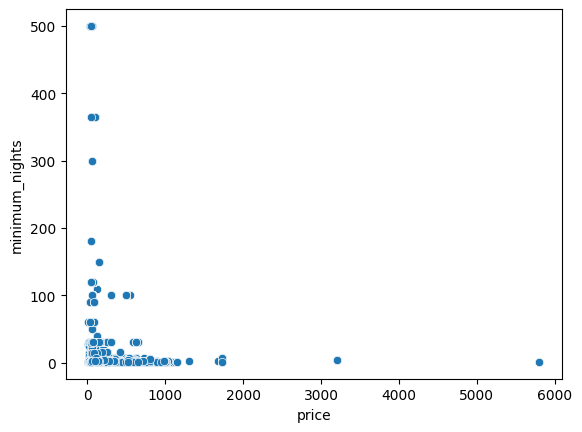

In [16]:
#scatter plot
sns.scatterplot(y = 'minimum_nights', x = 'price', data = cal_df)

<Axes: xlabel='price', ylabel='maximum_nights'>

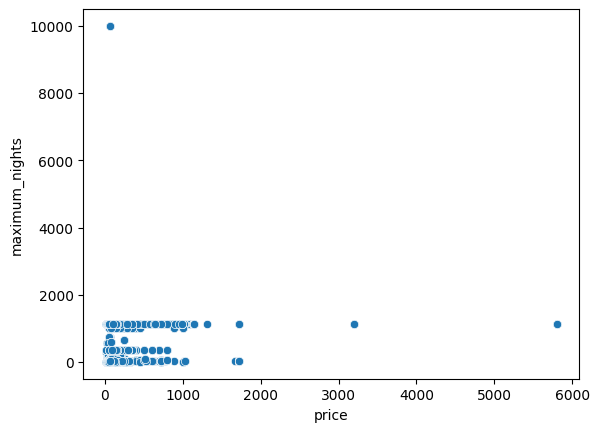

In [17]:
sns.scatterplot(y = 'maximum_nights', x = 'price', data = cal_df)

* we can clearly see that there is outliers present in the price , minimum_nights and maximum_nights.


In [18]:
#outliers removal from the columns :  price , minimum_nights and maximum_nights
import pandas as pd

def remove_outliers(df, column_name):
    # Calculate the first and third quartiles
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)

    # Calculate the interquartile range (IQR)
    IQR = Q3 - Q1

    # Define the lower and upper bounds for outlier detection
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter the DataFrame to remove outliers
    filtered_df = df[(df[column_name] >= lower_bound) & (df[column_name] <= upper_bound)]

    return filtered_df


In [19]:
cal_df1 = remove_outliers(cal_df, 'adjusted_price')

In [20]:
cal_df.shape, cal_df1.shape

((319117, 8), (296364, 8))

In [21]:
#for minimum_nights column
cal_df2 = remove_outliers(cal_df1,'minimum_nights')

In [22]:
cal_df1.shape, cal_df2.shape

((296364, 8), (258058, 8))

In [23]:
#for maximum_nights column
cal_df3= remove_outliers(cal_df2,'maximum_nights')


In [24]:
cal_df2.shape, cal_df3.shape

((258058, 8), (257900, 8))

<Axes: xlabel='maximum_nights', ylabel='Count'>

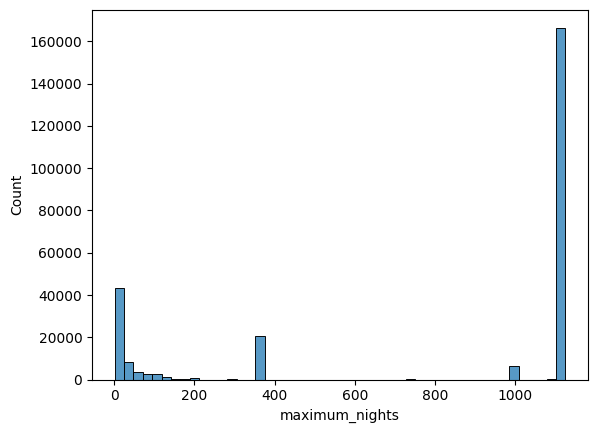

In [25]:
# distribution of minimum nights and maximum nights
sns.histplot( x = 'maximum_nights', data = cal_df3)


* Most of the listings are available to be booked for more than 1000 days

<Axes: xlabel='minimum_nights'>

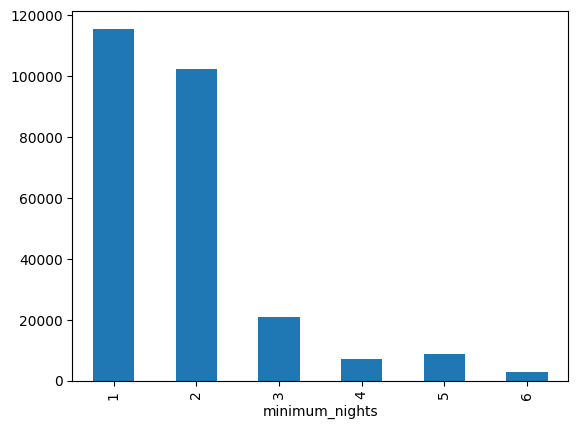

In [26]:
# distribution of minimum_nights
cal_df3.groupby('minimum_nights').size().plot(kind = 'bar')

* Most of the listings are available for booking at minimum nights of 1 and 2.

<Axes: xlabel='adjusted_price', ylabel='Density'>

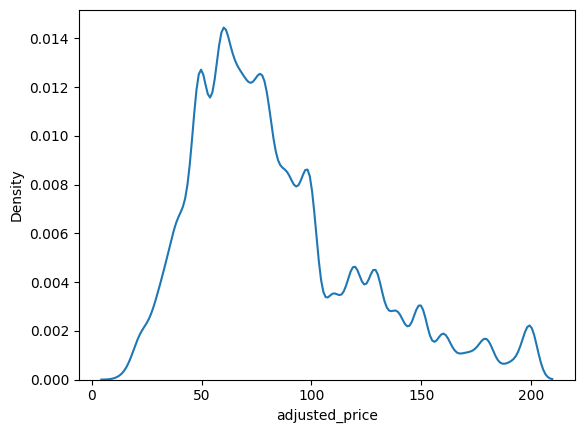

In [27]:
# distribution of price column
sns.kdeplot(cal_df3['adjusted_price'])

* The price column is right skewed.

In [28]:
# #Transformation of price column
# cal_df['adjusted_price'] = np.log(cal_df['adjusted_price'])
# from matplotlib import pyplot as plt
# sns.kdeplot(cal_df['adjusted_price'])

#### Host data

In [29]:
host_data.head()

,host_id,host_name,host_since,host_location,host_about
0,234077,Karin,2010-09-14 00:00:00.000000,"Antwerp, Flanders, Belgium",Ever since my childhood I dreamt of having my ...
1,334804,Ann,2011-01-04 00:00:00.000000,"Antwerp, Flemish Region, Belgium","Ciao, \r\nlooking forward to meet you!\r\nI lo..."
2,413052,Valérie,2011-02-27 00:00:00.000000,"Antwerp, Flanders, Belgium",NaN
3,452791,Tatiana,2011-03-20 00:00:00.000000,"Antwerp, Flanders, Belgium",World traveler with a penchant for adrenaline ...
4,462975,Els,2011-03-25 00:00:00.000000,"Edegem, Flanders, Belgium",I studied languages and cultural anthropology ...


In [30]:
host_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1111 entries, 0 to 1110
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   host_id        1111 non-null   int64 
 1   host_name      1111 non-null   object
 2   host_since     1111 non-null   object
 3   host_location  1108 non-null   object
 4   host_about     490 non-null    object
dtypes: int64(1), object(4)
memory usage: 43.5+ KB


In [31]:
#Removing the null values present in the host_location
host_df.dropna(subset = ['host_location'],inplace = True)

In [32]:
host_df.describe(include = 'O')

,host_name,host_since,host_location,host_about
count,1108,1108,1108,490
unique,749,925,149,488
top,Jan,2015-06-03 00:00:00.000000,"Antwerp, Flanders, Belgium","Hello traveller,\n\nWelcome to my profile! My ..."
freq,10,4,676,2


* There are 749 unique hosts.
* Hosts are serving from 149 unique locations.


In [33]:
host_df.groupby('host_location').size().sort_values()

host_location
 Zeeland, Netherlands                     1
Kiryas Joel, New York, United States      1
Kinrooi, Flanders, Belgium                1
Sitges, Catalonia, Spain                  1
Skopje, North Macedonia                   1
                                       ... 
Antwerpen, Vlaams Gewest, Belgium        20
Antwerpen, Vlaanderen, Belgium           25
Belgium                                  27
BE                                      114
Antwerp, Flanders, Belgium              676
Length: 149, dtype: int64

#### Listing data

In [34]:
listing_data.head()

,listing_id,listing_url,name,description,latitude,longitude,property_type,room_type,accomodates,bathrooms_text,bedrooms,beds,amenities,host_id
0,50904,https://www.airbnb.com/rooms/50904,aplace/antwerp: cosy suite - fashion district,Decorated in a vintage style combined with a f...,51.218575,4.398631,Room in boutique hotel,Hotel room,2,1 private bath,1.0,1.0,"[""Kitchen"", ""Smoke alarm"", ""Hair dryer"", ""Keyp...",234077
1,116134,https://www.airbnb.com/rooms/116134,Spacious apartment nearby Mas,Enjoy your stay at our 4 person apartment in t...,51.230510,4.405930,Entire rental unit,Entire home/apt,4,2.5 baths,2.0,2.0,"[""Refrigerator"", ""Elevator"", ""Paid street park...",586942
2,218916,https://www.airbnb.com/rooms/218916,Apartment with terrace in trendy Zurenborg,Do you enjoy authentic places with a lot of ch...,51.206330,4.429420,Entire condominium (condo),Entire home/apt,5,1 bath,1.0,3.0,"[""Paid street parking off premises"", ""Kitchen""...",915664
3,224333,https://www.airbnb.com/rooms/224333,Large stylish room in 1930s house + garden,"Large bedroom in classic 1930s house. Kitchen,...",51.197720,4.458530,Private room in residential home,Private room,2,2 shared baths,1.0,1.0,"[""Fire extinguisher"", ""Backyard"", ""Long term s...",1167377
4,224682,https://www.airbnb.com/rooms/224682,APARTMENT ROSCAM - OLD CENTRE ANTWERP,"<b>The space</b><br />Apartment ""Roscam"" is a ...",51.217220,4.397900,Entire rental unit,Entire home/apt,3,1 bath,1.0,2.0,"[""Refrigerator"", ""Kitchen"", ""Smoke alarm"", ""Sh...",1263933


In [35]:
#Data information
list_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1749 entries, 0 to 1748
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   listing_id      1749 non-null   int64  
 1   listing_url     1749 non-null   object 
 2   name            1749 non-null   object 
 3   description     1679 non-null   object 
 4   latitude        1749 non-null   float64
 5   longitude       1749 non-null   float64
 6   property_type   1749 non-null   object 
 7   room_type       1749 non-null   object 
 8   accomodates     1749 non-null   int64  
 9   bathrooms_text  1749 non-null   object 
 10  bedrooms        1621 non-null   float64
 11  beds            1708 non-null   float64
 12  amenities       1749 non-null   object 
 13  host_id         1749 non-null   int64  
dtypes: float64(4), int64(3), object(7)
memory usage: 191.4+ KB


In [36]:
#Data overview
list_df.describe()

,listing_id,latitude,longitude,accomodates,bedrooms,beds,host_id
count,1.749000e+03,1749.000000,1749.000000,1749.000000,1621.000000,1708.000000,1.749000e+03
mean,3.485506e+07,51.214069,4.413165,3.761578,1.529303,2.220726,1.417765e+08
std,1.523689e+07,0.013740,0.019373,2.771378,1.091453,2.227509,1.286506e+08
min,5.090400e+04,51.160084,4.290770,1.000000,1.000000,1.000000,2.340770e+05
25%,2.337286e+07,51.207870,4.400240,2.000000,1.000000,1.000000,2.875771e+07
50%,3.889829e+07,51.216540,4.409460,3.000000,1.000000,2.000000,1.033633e+08
75%,4.838954e+07,51.220880,4.424660,4.000000,2.000000,3.000000,2.344842e+08
max,5.398332e+07,51.349400,4.483470,16.000000,20.000000,44.000000,4.373093e+08


In [37]:
list_df.describe(include = 'O')

,listing_url,name,description,property_type,room_type,bathrooms_text,amenities
count,1749,1749,1679,1749,1749,1749,1749
unique,1749,1710,1556,39,4,26,1656
top,https://www.airbnb.com/rooms/50904,Luxury Suites Castel,"Bright and beautiful newly built apartment, ve...",Entire rental unit,Entire home/apt,1 bath,"[""Refrigerator"", ""Kitchen"", ""Smoke alarm"", ""Sh..."
freq,1,5,10,981,1379,825,9


* The number of accomodates vary from the 1 to 16.
* The number of beds are having values of 44 which is an anamoly.
* There are 39 different property_types present in the data.
* We can extract the number of bathrooms and kind of bathroom from bathrooms_text.
* We can use amentities column to extract different amentities available in a particular list.
* We need to impute the values the bedrooms and beds column.


In [38]:
# Frequency distribution of bedrooms
list_df['bedrooms'].value_counts()

1.0     1047
2.0      428
3.0       91
4.0       31
5.0       11
7.0        5
10.0       2
11.0       1
8.0        1
6.0        1
9.0        1
15.0       1
20.0       1
Name: bedrooms, dtype: int64

<Axes: xlabel='beds'>

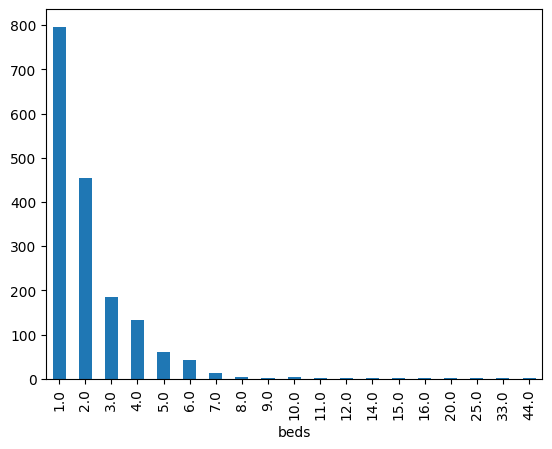

In [39]:
# Frequency distribution of bedrooms
list_df.groupby('beds').size().plot(kind ='bar')

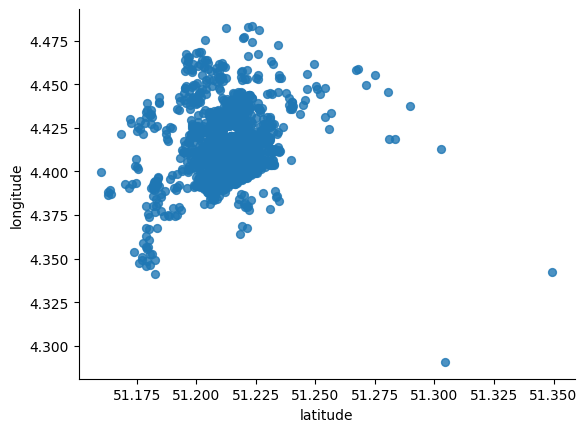

In [40]:
# @title latitude vs longitude

from matplotlib import pyplot as plt
listing_data.plot(kind='scatter', x='latitude', y='longitude', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

<Axes: xlabel='accomodates'>

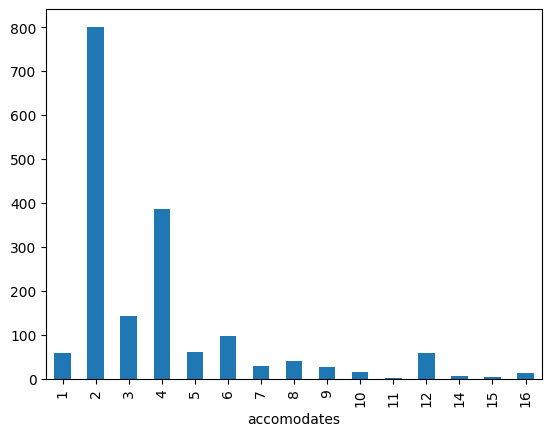

In [41]:
#Frequency distribution of accomodates
list_df.groupby('accomodates').size().plot(kind ='bar')

<ipython-input-42-34d00ae91796>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(listing_data, x='accomodates', y='room_type', inner='box', palette='Dark2')


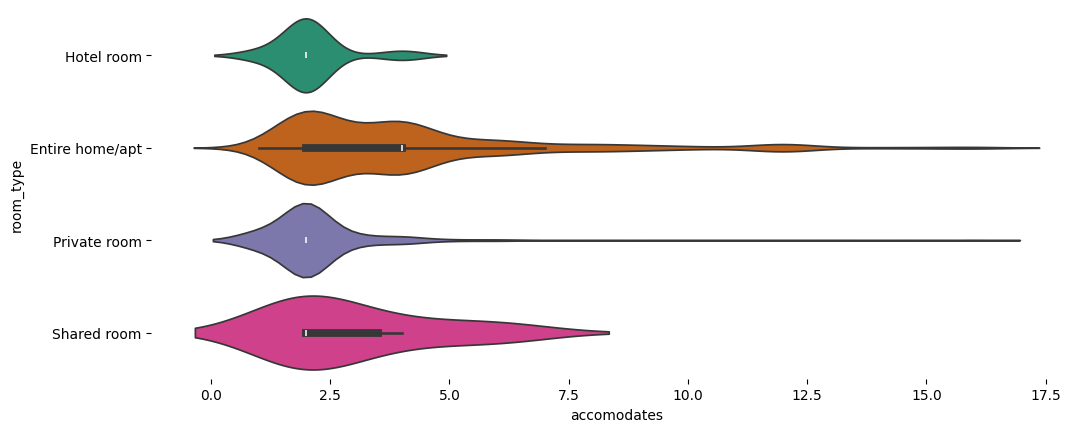

In [42]:
# @title room_type vs accomodates

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(listing_data['room_type'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(listing_data, x='accomodates', y='room_type', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [43]:
#Handling null values
mode_value = list_df['beds'].mode()[0]

# Impute null values with the mode
list_df['beds'].fillna(mode_value, inplace=True)

# Check if there are any null values left
print(list_df['beds'].isnull().sum())

0


In [44]:
# Splitting and handling non-numeric values
split_df = list_df['bathrooms_text'].str.split(' ', n=1, expand=True)
list_df['no_of_bathroom'] = split_df[0].apply(lambda x: float(x) if x.replace('.', '', 1).isdigit() else None)
list_df['kind_of_bathroom'] = split_df[1]

# Check the DataFrame after splitting
print(list_df[['no_of_bathroom', 'kind_of_bathroom']])



      no_of_bathroom kind_of_bathroom
0                1.0     private bath
1                2.5            baths
2                1.0             bath
3                2.0     shared baths
4                1.0             bath
...              ...              ...
1744             1.5            baths
1745             1.0             bath
1746             1.0             bath
1747             7.5            baths
1748             1.5            baths

[1749 rows x 2 columns]


In [45]:
list_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1749 entries, 0 to 1748
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   listing_id        1749 non-null   int64  
 1   listing_url       1749 non-null   object 
 2   name              1749 non-null   object 
 3   description       1679 non-null   object 
 4   latitude          1749 non-null   float64
 5   longitude         1749 non-null   float64
 6   property_type     1749 non-null   object 
 7   room_type         1749 non-null   object 
 8   accomodates       1749 non-null   int64  
 9   bathrooms_text    1749 non-null   object 
 10  bedrooms          1621 non-null   float64
 11  beds              1749 non-null   float64
 12  amenities         1749 non-null   object 
 13  host_id           1749 non-null   int64  
 14  no_of_bathroom    1738 non-null   float64
 15  kind_of_bathroom  1744 non-null   object 
dtypes: float64(5), int64(3), object(8)
memory 

In [46]:
pd.set_option('display.max_columns', None)  # Setting to display all columns

In [47]:
# applying the floor of no of bathroom
list_df['no_of_bathroom'] =  np.floor(list_df['no_of_bathroom'])
print(list_df['no_of_bathroom'])

0       1.0
1       2.0
2       1.0
3       2.0
4       1.0
       ... 
1744    1.0
1745    1.0
1746    1.0
1747    7.0
1748    1.0
Name: no_of_bathroom, Length: 1749, dtype: float64


In [48]:
#data having null rows with no_of_bathroom
list_df['no_of_bathroom'].isnull().sum()

11

In [49]:
#removing the null values present in the column no_of_bathroom
list_df.dropna(subset = ['no_of_bathroom'], inplace = True)

In [50]:
#changing the data type of no_of_bathroom
list_df['no_of_bathroom'].astype(int)

0       1
1       2
2       1
3       2
4       1
       ..
1744    1
1745    1
1746    1
1747    7
1748    1
Name: no_of_bathroom, Length: 1738, dtype: int64

In [51]:
list_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1738 entries, 0 to 1748
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   listing_id        1738 non-null   int64  
 1   listing_url       1738 non-null   object 
 2   name              1738 non-null   object 
 3   description       1668 non-null   object 
 4   latitude          1738 non-null   float64
 5   longitude         1738 non-null   float64
 6   property_type     1738 non-null   object 
 7   room_type         1738 non-null   object 
 8   accomodates       1738 non-null   int64  
 9   bathrooms_text    1738 non-null   object 
 10  bedrooms          1612 non-null   float64
 11  beds              1738 non-null   float64
 12  amenities         1738 non-null   object 
 13  host_id           1738 non-null   int64  
 14  no_of_bathroom    1738 non-null   float64
 15  kind_of_bathroom  1738 non-null   object 
dtypes: float64(5), int64(3), object(8)
memory 

In [52]:
#One hot encoding / Feature engineering
amenity_counts = {}
for amenities in list_df['amenities']:
    amenities_list = amenities.strip('][').split(', ')
    for amenity in amenities_list:
        amenity = amenity.strip().strip('"\'')  # Removing both single and double quotes
        if amenity not in amenity_counts:
            amenity_counts[amenity] = 1
        else:
            amenity_counts[amenity] += 1

print(amenity_counts)


{'Kitchen': 1580, 'Smoke alarm': 1568, 'Hair dryer': 1330, 'Keypad': 104, 'Carbon monoxide alarm': 805, 'Mini fridge': 214, 'Wifi': 1674, 'Dishes and silverware': 1245, 'Security cameras on property': 95, 'Clothing storage': 226, 'Luggage dropoff allowed': 469, 'Bed linens': 1063, 'Iron': 1026, 'Dedicated workspace': 1181, 'Microwave': 954, 'Molton Brown body soap': 4, 'Essentials': 1639, 'Hot water kettle': 411, 'Long term stays allowed': 1436, 'Portable fans': 162, 'Wine glasses': 467, 'Heating': 1457, 'Paid parking off premises': 377, 'Hot water': 1337, 'Fire extinguisher': 1216, 'Bluetooth sound system': 32, 'Coffee maker': 1096, 'Molton Brown shampoo': 4, 'Safe': 22, 'Hangers': 1431, 'Cable TV': 386, 'TV with standard cable': 365, 'Shower gel': 587, 'Refrigerator': 1128, 'Elevator': 439, 'Paid street parking off premises': 93, 'Shampoo': 1208, 'Outdoor furniture': 190, 'Stove': 843, 'Oven': 864, 'Cooking basics': 1231, 'Clothing storage: dresser': 30, 'wardrobe': 3, 'and closet': 

In [53]:
sorted_amenity_counts = dict(sorted(amenity_counts.items(), key=lambda x: x[1], reverse=True))
sorted_amenity_counts

{'Wifi': 1674,
 'Essentials': 1639,
 'Kitchen': 1580,
 'Smoke alarm': 1568,
 'Heating': 1457,
 'Long term stays allowed': 1436,
 'Hangers': 1431,
 'Hot water': 1337,
 'Hair dryer': 1330,
 'Dishes and silverware': 1245,
 'Cooking basics': 1231,
 'Fire extinguisher': 1216,
 'Shampoo': 1208,
 'Dedicated workspace': 1181,
 'Refrigerator': 1128,
 'Coffee maker': 1096,
 'Bed linens': 1063,
 'Iron': 1026,
 'Microwave': 954,
 'First aid kit': 905,
 'Oven': 864,
 'Stove': 843,
 'Washer': 810,
 'Carbon monoxide alarm': 805,
 'Private entrance': 775,
 'TV': 708,
 'Extra pillows and blankets': 678,
 'Dishwasher': 597,
 'Shower gel': 587,
 'Cleaning products': 519,
 'Dryer': 511,
 'Dining table': 491,
 'Freezer': 488,
 'Luggage dropoff allowed': 469,
 'Wine glasses': 467,
 'Host greets you': 460,
 'Elevator': 439,
 'Body soap': 423,
 'Hot water kettle': 411,
 'Cable TV': 386,
 'Paid parking off premises': 377,
 'TV with standard cable': 365,
 'Room-darkening shades': 348,
 'Lockbox': 345,
 'Laundro

In [54]:
imp_amenities = []
for key, value in sorted_amenity_counts.items():
  if sorted_amenity_counts[key] > 500:
    imp_amenities.append(key)

In [55]:
print(imp_amenities)

['Wifi', 'Essentials', 'Kitchen', 'Smoke alarm', 'Heating', 'Long term stays allowed', 'Hangers', 'Hot water', 'Hair dryer', 'Dishes and silverware', 'Cooking basics', 'Fire extinguisher', 'Shampoo', 'Dedicated workspace', 'Refrigerator', 'Coffee maker', 'Bed linens', 'Iron', 'Microwave', 'First aid kit', 'Oven', 'Stove', 'Washer', 'Carbon monoxide alarm', 'Private entrance', 'TV', 'Extra pillows and blankets', 'Dishwasher', 'Shower gel', 'Cleaning products', 'Dryer']


In [56]:

for amenity in imp_amenities:
    list_df[amenity] = list_df['amenities'].apply(lambda x: 1 if amenity in x else 0)

In [57]:
list_df.head()

,listing_id,listing_url,name,description,latitude,longitude,property_type,room_type,accomodates,bathrooms_text,bedrooms,beds,amenities,host_id,no_of_bathroom,kind_of_bathroom,Wifi,Essentials,Kitchen,Smoke alarm,Heating,Long term stays allowed,Hangers,Hot water,Hair dryer,Dishes and silverware,Cooking basics,Fire extinguisher,Shampoo,Dedicated workspace,Refrigerator,Coffee maker,Bed linens,Iron,Microwave,First aid kit,Oven,Stove,Washer,Carbon monoxide alarm,Private entrance,TV,Extra pillows and blankets,Dishwasher,Shower gel,Cleaning products,Dryer
0,50904,https://www.airbnb.com/rooms/50904,aplace/antwerp: cosy suite - fashion district,Decorated in a vintage style combined with a f...,51.218575,4.398631,Room in boutique hotel,Hotel room,2,1 private bath,1.0,1.0,"[""Kitchen"", ""Smoke alarm"", ""Hair dryer"", ""Keyp...",234077,1.0,private bath,1,1,1,1,1,1,1,1,1,1,0,1,0,1,0,1,1,1,1,0,0,0,0,1,0,1,0,0,1,0,0
1,116134,https://www.airbnb.com/rooms/116134,Spacious apartment nearby Mas,Enjoy your stay at our 4 person apartment in t...,51.230510,4.405930,Entire rental unit,Entire home/apt,4,2.5 baths,2.0,2.0,"[""Refrigerator"", ""Elevator"", ""Paid street park...",586942,2.0,baths,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,0,1,0,1,0
2,218916,https://www.airbnb.com/rooms/218916,Apartment with terrace in trendy Zurenborg,Do you enjoy authentic places with a lot of ch...,51.206330,4.429420,Entire condominium (condo),Entire home/apt,5,1 bath,1.0,3.0,"[""Paid street parking off premises"", ""Kitchen""...",915664,1.0,bath,1,1,1,1,0,1,1,1,1,1,1,1,1,0,0,1,1,1,0,1,0,0,0,1,0,0,1,0,1,1,0
3,224333,https://www.airbnb.com/rooms/224333,Large stylish room in 1930s house + garden,"Large bedroom in classic 1930s house. Kitchen,...",51.197720,4.458530,Private room in residential home,Private room,2,2 shared baths,1.0,1.0,"[""Fire extinguisher"", ""Backyard"", ""Long term s...",1167377,2.0,shared baths,1,0,1,1,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0
4,224682,https://www.airbnb.com/rooms/224682,APARTMENT ROSCAM - OLD CENTRE ANTWERP,"<b>The space</b><br />Apartment ""Roscam"" is a ...",51.217220,4.397900,Entire rental unit,Entire home/apt,3,1 bath,1.0,2.0,"[""Refrigerator"", ""Kitchen"", ""Smoke alarm"", ""Sh...",1263933,1.0,bath,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,0,1,1,0,1,0,1,0,0,0,0,0,0,0


In [58]:
mode_value = list_df['bedrooms'].mode()[0]

# Impute null values with the mode
list_df['bedrooms'].fillna(mode_value, inplace=True)

# Check if there are any null values left
print(list_df['bedrooms'].isnull().sum())

0


In [59]:
#different property types present in the data
list_df['property_type'].unique()

array(['Room in boutique hotel', 'Entire rental unit',
       'Entire condominium (condo)', 'Private room in residential home',
       'Private room in townhouse', 'Entire loft',
       'Entire residential home', 'Private room in boat',
       'Private room in bed and breakfast', 'Entire townhouse',
       'Private room in loft', 'Shared room in residential home',
       'Private room in rental unit', 'Entire cottage', 'Private room',
       'Entire villa', 'Yurt', 'Houseboat',
       'Private room in condominium (condo)', 'Tent',
       'Entire serviced apartment', 'Tiny house', 'Entire guest suite',
       'Private room in guest suite', 'Room in hotel',
       'Private room in guesthouse', 'Private room in villa',
       'Entire guesthouse', 'Room in aparthotel',
       'Private room in religious building', 'Shared room in loft',
       'Casa particular', 'Private room in serviced apartment',
       'Shared room in bed and breakfast',
       'Private room in casa particular',
       

In [60]:
list_df['room_type'].unique()

array(['Hotel room', 'Entire home/apt', 'Private room', 'Shared room'],
      dtype=object)

#### Reviews data

In [61]:
reviews_df.head()

,review_id,listing_id,date,reviewer_id,reviewer_name,comments
0,1,50904,2015-05-06 00:00:00.000000,19482395,Jihae,Karin’s “Aplace” is absolutely beautiful and c...
1,2,50904,2021-10-10 00:00:00.000000,333559,Emilie,"Karin is a wonderful host, she was really help..."
2,3,116134,2012-03-05 00:00:00.000000,928644,Aurélien,"Amazing flat, really close from the MAS Musem,..."
3,4,116134,2012-05-25 00:00:00.000000,231288,Gail,"This is a well equipped, very comfortable apar..."
4,5,116134,2013-09-03 00:00:00.000000,7984251,Marcel,This is a very nice appartement. We really lik...


In [62]:
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62987 entries, 0 to 62986
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   review_id      62987 non-null  int64 
 1   listing_id     62987 non-null  int64 
 2   date           62987 non-null  object
 3   reviewer_id    62987 non-null  int64 
 4   reviewer_name  62987 non-null  object
 5   comments       62923 non-null  object
dtypes: int64(3), object(3)
memory usage: 2.9+ MB


There are some null values present in the data.
We can remove the rows having the comments as null.

In [63]:
#removing the null values
reviews_df.dropna(inplace = True)

In [64]:
# data overview
reviews_df.describe()

,review_id,listing_id,reviewer_id
count,62923.000000,6.292300e+04,6.292300e+04
mean,31484.089872,2.276433e+07,1.147765e+08
std,18180.401611,1.417494e+07,1.132173e+08
min,1.000000,5.090400e+04,5.150000e+02
25%,15740.500000,9.913124e+06,2.431438e+07
50%,31478.000000,2.165832e+07,7.214954e+07
75%,47224.500000,3.405420e+07,1.780036e+08
max,62987.000000,5.382519e+07,4.367984e+08


In [65]:
reviews_df.describe(include = 'O')

,date,reviewer_name,comments
count,62923,62923,62923
unique,2941,13592,61443
top,2021-11-14 00:00:00.000000,David,.
freq,232,319,130


* There are 130 comments as '.' which makes no sense.

In [66]:
#occurence of different comments
reviews_df['comments'].value_counts()

.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               130
Top                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 

* There are '.' and '-' comments can be deleted as they do not make any sense.

In [67]:
#removing the rows with comments as '.' and '-'
reviews_df = reviews_df[(reviews_df['comments'] != '.') & (reviews_df['comments'] != '-')]


In [68]:
#Change in shape
reviews_df.shape

(62755, 6)

In [85]:
no_of_reviews = reviews_df.groupby("listing_id").size().reset_index(name='no_of_reviews_count')

In [88]:
no_of_reviews.shape

(1525, 2)

#### Merging dataframes

In [86]:
merge_df1 = pd.merge(cal_df,list_df, on ="listing_id", how = "inner")
merge_df2 = pd.merge(merge_df1, host_df, on ="host_id", how = "inner")
merged_df = pd.merge(merge_df2, no_of_reviews, on ="listing_id", how = "inner")

In [89]:
merged_df.shape

(275652, 59)

In [91]:
merged_df.head()

,calender_id,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights,listing_url,name,description,latitude,longitude,property_type,room_type,accomodates,bathrooms_text,bedrooms,beds,amenities,host_id,no_of_bathroom,kind_of_bathroom,Wifi,Essentials,Kitchen,Smoke alarm,Heating,Long term stays allowed,Hangers,Hot water,Hair dryer,Dishes and silverware,Cooking basics,Fire extinguisher,Shampoo,Dedicated workspace,Refrigerator,Coffee maker,Bed linens,Iron,Microwave,First aid kit,Oven,Stove,Washer,Carbon monoxide alarm,Private entrance,TV,Extra pillows and blankets,Dishwasher,Shower gel,Cleaning products,Dryer,host_name,host_since,host_location,host_about,no_of_reviews_count
0,1,40334325,2022-08-03 00:00:00.000000,0,56.0,56.0,3,5,https://www.airbnb.com/rooms/40334325,Luxurious flat in central location,Luxurious flat in Antwerp close to various pub...,51.20989,4.42298,Entire rental unit,Entire home/apt,2,1 bath,1.0,2.0,"[""Hot water"", ""Refrigerator"", ""Private entranc...",311556587,1.0,bath,1,1,1,1,1,0,1,1,0,1,1,0,1,1,1,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,Xander,2019-11-23 00:00:00.000000,BE,NaN,1
1,2109,40334325,2022-02-14 00:00:00.000000,1,56.0,56.0,3,5,https://www.airbnb.com/rooms/40334325,Luxurious flat in central location,Luxurious flat in Antwerp close to various pub...,51.20989,4.42298,Entire rental unit,Entire home/apt,2,1 bath,1.0,2.0,"[""Hot water"", ""Refrigerator"", ""Private entranc...",311556587,1.0,bath,1,1,1,1,1,0,1,1,0,1,1,0,1,1,1,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,Xander,2019-11-23 00:00:00.000000,BE,NaN,1
2,3617,40334325,2022-04-26 00:00:00.000000,0,56.0,56.0,3,5,https://www.airbnb.com/rooms/40334325,Luxurious flat in central location,Luxurious flat in Antwerp close to various pub...,51.20989,4.42298,Entire rental unit,Entire home/apt,2,1 bath,1.0,2.0,"[""Hot water"", ""Refrigerator"", ""Private entranc...",311556587,1.0,bath,1,1,1,1,1,0,1,1,0,1,1,0,1,1,1,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,Xander,2019-11-23 00:00:00.000000,BE,NaN,1
3,5560,40334325,2022-04-08 00:00:00.000000,0,56.0,56.0,3,5,https://www.airbnb.com/rooms/40334325,Luxurious flat in central location,Luxurious flat in Antwerp close to various pub...,51.20989,4.42298,Entire rental unit,Entire home/apt,2,1 bath,1.0,2.0,"[""Hot water"", ""Refrigerator"", ""Private entranc...",311556587,1.0,bath,1,1,1,1,1,0,1,1,0,1,1,0,1,1,1,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,Xander,2019-11-23 00:00:00.000000,BE,NaN,1
4,8188,40334325,2022-04-11 00:00:00.000000,0,56.0,56.0,3,5,https://www.airbnb.com/rooms/40334325,Luxurious flat in central location,Luxurious flat in Antwerp close to various pub...,51.20989,4.42298,Entire rental unit,Entire home/apt,2,1 bath,1.0,2.0,"[""Hot water"", ""Refrigerator"", ""Private entranc...",311556587,1.0,bath,1,1,1,1,1,0,1,1,0,1,1,0,1,1,1,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,Xander,2019-11-23 00:00:00.000000,BE,NaN,1


In [92]:
#converting the date column as date time
merged_df['date'] = pd.to_datetime(merged_df['date']).dt.date
merged_df['host_since'] = pd.to_datetime(merged_df['host_since']).dt.date

In [93]:
merged_df.head()

,calender_id,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights,listing_url,name,description,latitude,longitude,property_type,room_type,accomodates,bathrooms_text,bedrooms,beds,amenities,host_id,no_of_bathroom,kind_of_bathroom,Wifi,Essentials,Kitchen,Smoke alarm,Heating,Long term stays allowed,Hangers,Hot water,Hair dryer,Dishes and silverware,Cooking basics,Fire extinguisher,Shampoo,Dedicated workspace,Refrigerator,Coffee maker,Bed linens,Iron,Microwave,First aid kit,Oven,Stove,Washer,Carbon monoxide alarm,Private entrance,TV,Extra pillows and blankets,Dishwasher,Shower gel,Cleaning products,Dryer,host_name,host_since,host_location,host_about,no_of_reviews_count
0,1,40334325,2022-08-03,0,56.0,56.0,3,5,https://www.airbnb.com/rooms/40334325,Luxurious flat in central location,Luxurious flat in Antwerp close to various pub...,51.20989,4.42298,Entire rental unit,Entire home/apt,2,1 bath,1.0,2.0,"[""Hot water"", ""Refrigerator"", ""Private entranc...",311556587,1.0,bath,1,1,1,1,1,0,1,1,0,1,1,0,1,1,1,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,Xander,2019-11-23,BE,NaN,1
1,2109,40334325,2022-02-14,1,56.0,56.0,3,5,https://www.airbnb.com/rooms/40334325,Luxurious flat in central location,Luxurious flat in Antwerp close to various pub...,51.20989,4.42298,Entire rental unit,Entire home/apt,2,1 bath,1.0,2.0,"[""Hot water"", ""Refrigerator"", ""Private entranc...",311556587,1.0,bath,1,1,1,1,1,0,1,1,0,1,1,0,1,1,1,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,Xander,2019-11-23,BE,NaN,1
2,3617,40334325,2022-04-26,0,56.0,56.0,3,5,https://www.airbnb.com/rooms/40334325,Luxurious flat in central location,Luxurious flat in Antwerp close to various pub...,51.20989,4.42298,Entire rental unit,Entire home/apt,2,1 bath,1.0,2.0,"[""Hot water"", ""Refrigerator"", ""Private entranc...",311556587,1.0,bath,1,1,1,1,1,0,1,1,0,1,1,0,1,1,1,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,Xander,2019-11-23,BE,NaN,1
3,5560,40334325,2022-04-08,0,56.0,56.0,3,5,https://www.airbnb.com/rooms/40334325,Luxurious flat in central location,Luxurious flat in Antwerp close to various pub...,51.20989,4.42298,Entire rental unit,Entire home/apt,2,1 bath,1.0,2.0,"[""Hot water"", ""Refrigerator"", ""Private entranc...",311556587,1.0,bath,1,1,1,1,1,0,1,1,0,1,1,0,1,1,1,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,Xander,2019-11-23,BE,NaN,1
4,8188,40334325,2022-04-11,0,56.0,56.0,3,5,https://www.airbnb.com/rooms/40334325,Luxurious flat in central location,Luxurious flat in Antwerp close to various pub...,51.20989,4.42298,Entire rental unit,Entire home/apt,2,1 bath,1.0,2.0,"[""Hot water"", ""Refrigerator"", ""Private entranc...",311556587,1.0,bath,1,1,1,1,1,0,1,1,0,1,1,0,1,1,1,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,Xander,2019-11-23,BE,NaN,1


* We can remove some columns which are not adding much like: calender_id, listing_url, bathrooms_text, host_name and host_about.

In [94]:
merged_df.drop(columns=['calender_id','listing_url', 'bathrooms_text', 'host_name','host_about'], inplace=True)

In [95]:
merged_df

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights,name,description,latitude,longitude,property_type,room_type,accomodates,bedrooms,beds,amenities,host_id,no_of_bathroom,kind_of_bathroom,Wifi,Essentials,Kitchen,Smoke alarm,Heating,Long term stays allowed,Hangers,Hot water,Hair dryer,Dishes and silverware,Cooking basics,Fire extinguisher,Shampoo,Dedicated workspace,Refrigerator,Coffee maker,Bed linens,Iron,Microwave,First aid kit,Oven,Stove,Washer,Carbon monoxide alarm,Private entrance,TV,Extra pillows and blankets,Dishwasher,Shower gel,Cleaning products,Dryer,host_since,host_location,no_of_reviews_count
0,40334325,2022-08-03,0,56.0,56.0,3,5,Luxurious flat in central location,Luxurious flat in Antwerp close to various pub...,51.20989,4.42298,Entire rental unit,Entire home/apt,2,1.0,2.0,"[""Hot water"", ""Refrigerator"", ""Private entranc...",311556587,1.0,bath,1,1,1,1,1,0,1,1,0,1,1,0,1,1,1,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,2019-11-23,BE,1
1,40334325,2022-02-14,1,56.0,56.0,3,5,Luxurious flat in central location,Luxurious flat in Antwerp close to various pub...,51.20989,4.42298,Entire rental unit,Entire home/apt,2,1.0,2.0,"[""Hot water"", ""Refrigerator"", ""Private entranc...",311556587,1.0,bath,1,1,1,1,1,0,1,1,0,1,1,0,1,1,1,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,2019-11-23,BE,1
2,40334325,2022-04-26,0,56.0,56.0,3,5,Luxurious flat in central location,Luxurious flat in Antwerp close to various pub...,51.20989,4.42298,Entire rental unit,Entire home/apt,2,1.0,2.0,"[""Hot water"", ""Refrigerator"", ""Private entranc...",311556587,1.0,bath,1,1,1,1,1,0,1,1,0,1,1,0,1,1,1,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,2019-11-23,BE,1
3,40334325,2022-04-08,0,56.0,56.0,3,5,Luxurious flat in central location,Luxurious flat in Antwerp close to various pub...,51.20989,4.42298,Entire rental unit,Entire home/apt,2,1.0,2.0,"[""Hot water"", ""Refrigerator"", ""Private entranc...",311556587,1.0,bath,1,1,1,1,1,0,1,1,0,1,1,0,1,1,1,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,2019-11-23,BE,1
4,40334325,2022-04-11,0,56.0,56.0,3,5,Luxurious flat in central location,Luxurious flat in Antwerp close to various pub...,51.20989,4.42298,Entire rental unit,Entire home/apt,2,1.0,2.0,"[""Hot water"", ""Refrigerator"", ""Private entranc...",311556587,1.0,bath,1,1,1,1,1,0,1,1,0,1,1,0,1,1,1,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,2019-11-23,BE,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275647,35379310,2022-03-13,1,60.0,60.0,1,1125,"Paz, conforto e tranquilidade tranquilidade","Espaço tranquilo ,quarto com guarda roupa med...",51.21017,4.45431,Private room in rental unit,Private room,1,1.0,1.0,"[""Hot water"", ""Fire extinguisher"", ""Long term ...",265837980,1.0,shared bath,1,1,1,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,2019-06-02,BE,1
275648,35379310,2022-01-05,1,60.0,60.0,1,1125,"Paz, conforto e tranquilidade tranquilidade","Espaço tranquilo ,quarto com guarda roupa med...",51.21017,4.45431,Private room in rental unit,Private room,1,1.0,1.0,"[""Hot water"", ""Fire extinguisher"", ""Long term ...",265837980,1.0,shared bath,1,1,1,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,2019-06-02,BE,1
275649,35379310,2022-03-28,1,60.0,60.0,1,1125,"Paz, conforto e tranquilidade tranquilidade","Espaço tranquilo ,quarto com guarda roupa med...",51.21017,4.45431,Private room in rental unit,Private room,1,1.0,1.0,"[""Hot water"", ""Fire extinguisher"", ""Long term ...",265837980,1.0,shared bath,1,1,1,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,2019-06-02,BE,1
275650,35379310,2022-05-23,1,60.0,60.0,1,1125,"Paz, conforto e tranquilidade tranquilidade","Espaço tranquilo ,quarto com guarda roupa med...",51.21017,4.45431,Private room in rental unit,Private room,1,1.0,1.0,"[""Hot water"", ""Fire extinguisher"", ""Long term ...",265837980,1.0,shared bath,1,1,1,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,1

In [96]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 275652 entries, 0 to 275651
Data columns (total 54 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   listing_id                  275652 non-null  int64  
 1   date                        275652 non-null  object 
 2   available                   275652 non-null  int64  
 3   price                       275652 non-null  float64
 4   adjusted_price              275652 non-null  float64
 5   minimum_nights              275652 non-null  int64  
 6   maximum_nights              275652 non-null  int64  
 7   name                        275652 non-null  object 
 8   description                 266365 non-null  object 
 9   latitude                    275652 non-null  float64
 10  longitude                   275652 non-null  float64
 11  property_type               275652 non-null  object 
 12  room_type                   275652 non-null  object 
 13  accomodates   

In [100]:
#Removing this date column
merged_df.drop(columns= ['date'] , inplace = True)

In [98]:
# Now we can go ahead apply ML algorithms

datetime.date(2021, 12, 14)